In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
EDA_t1 = pd.read_csv("data/train.csv")
EDA_t1.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


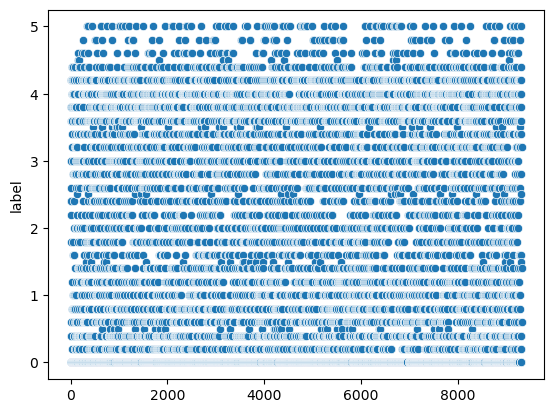

In [3]:
fig, ax = plt.subplots()
sns.scatterplot(x=np.arange(len(EDA_t1)), y='label', data=EDA_t1)
plt.show()

In [4]:
EDA_t1["source"].value_counts()

source
petition-sampled    2352
nsmc-sampled        2296
slack-sampled       2024
slack-rtt           1047
petition-rtt         817
nsmc-rtt             788
Name: count, dtype: int64

# 1.
### source별로 그룹을 묶고 내림차순으로 정렬하여 갯수 추출
### 결과에 보면 slack-sampled까지 응답자가 많고 밑에 slack-rtt, petition-rtt, nsmc-rtt는 응답자가 적음

<Axes: xlabel='count', ylabel='source'>

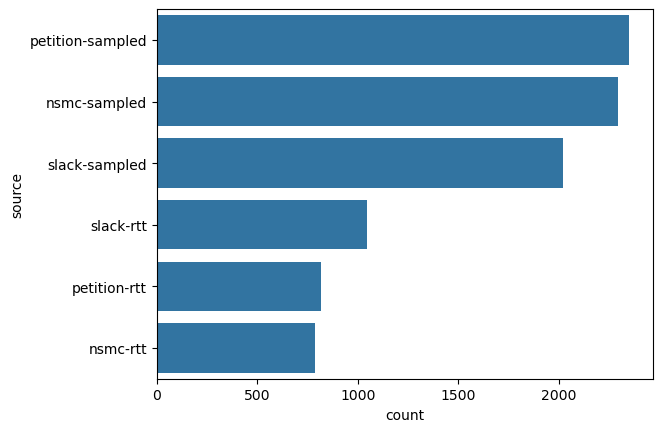

In [5]:
sns.countplot(y="source", data=EDA_t1, order=EDA_t1['source'].value_counts().index)

In [6]:
EDA_t1.groupby(["source"])['binary-label'].value_counts()

source            binary-label
nsmc-rtt          1.0              647
                  0.0              141
nsmc-sampled      0.0             1791
                  1.0              505
petition-rtt      1.0              707
                  0.0              110
petition-sampled  0.0             1719
                  1.0              633
slack-rtt         1.0              878
                  0.0              169
slack-sampled     0.0             1762
                  1.0              262
Name: count, dtype: int64

# 2.
### 'binary-label' 를 추가로 구분

<Axes: xlabel='count', ylabel='source'>

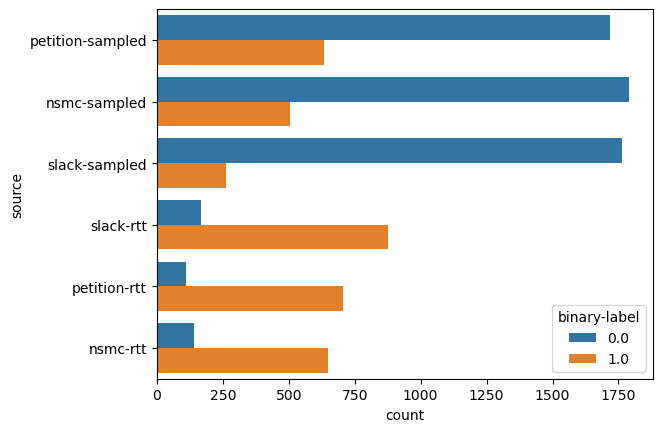

In [7]:
sns.countplot(y='source', data=EDA_t1,
              hue='binary-label',
              order=EDA_t1['source'].value_counts().index
             )

### 위 그래프 보면 1-3등이 응답자가 많지만 0이 많이 분포되어있고, 4-6등이 응답자가 적지만 1이 많이 분포하는게 보인다.

<Axes: xlabel='count', ylabel='source'>

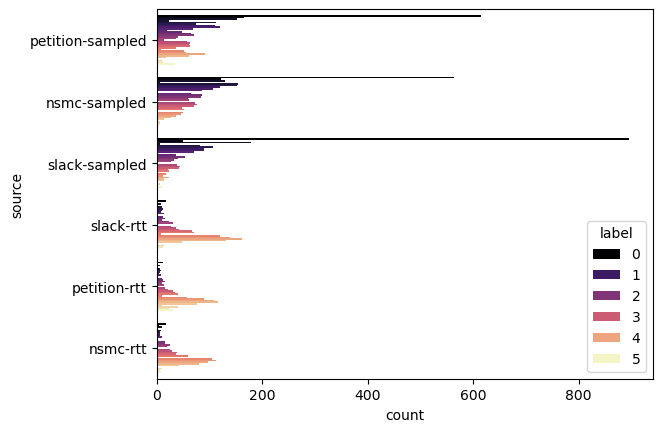

In [8]:
sns.countplot(y='source', data=EDA_t1,
              hue='label',
              order=EDA_t1['source'].value_counts().index,
              palette='magma'
             )

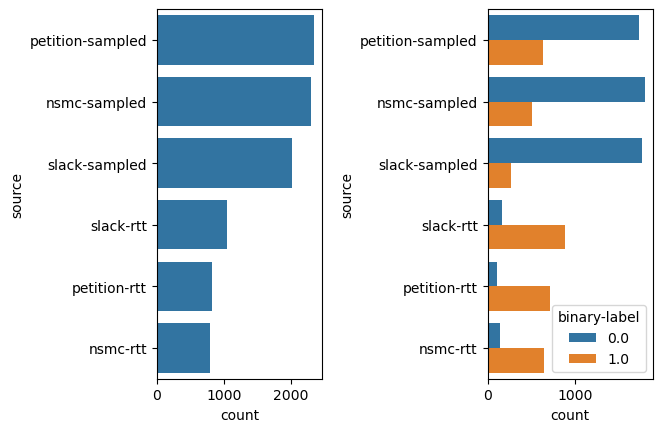

In [9]:
fig, axes = plt.subplots(1, 2)

sns.countplot(y="source", data=EDA_t1, order=EDA_t1['source'].value_counts().index,
              ax=axes[0])

sns.countplot(y='source', data=EDA_t1,
              hue='binary-label',
              order=EDA_t1['source'].value_counts().index,
              ax=axes[1]
             )

plt.subplots_adjust(wspace=1)  # 가로 간격을 넓힘

plt.show()

In [10]:
EDA_d = pd.read_csv("data/dev.csv")
EDA_d.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0


<Axes: xlabel='count', ylabel='source'>

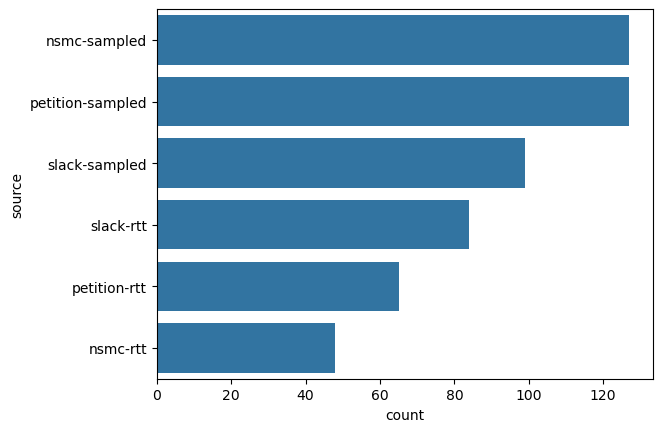

In [11]:
sns.countplot(y="source", data=EDA_d, order=EDA_d['source'].value_counts().index)

<Axes: xlabel='count', ylabel='source'>

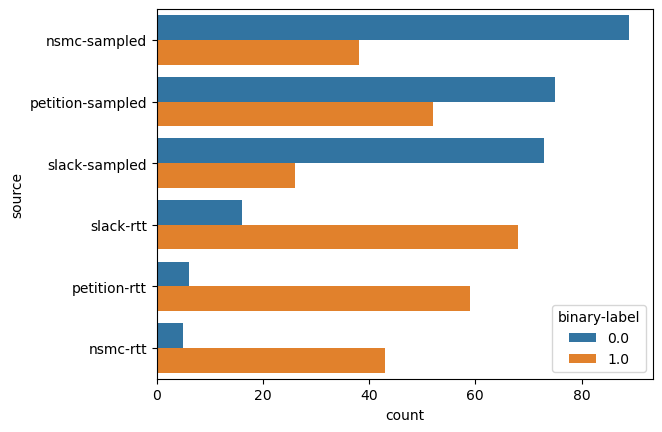

In [12]:
sns.countplot(y='source', data=EDA_d,
              hue='binary-label',
              order=EDA_d['source'].value_counts().index
             )

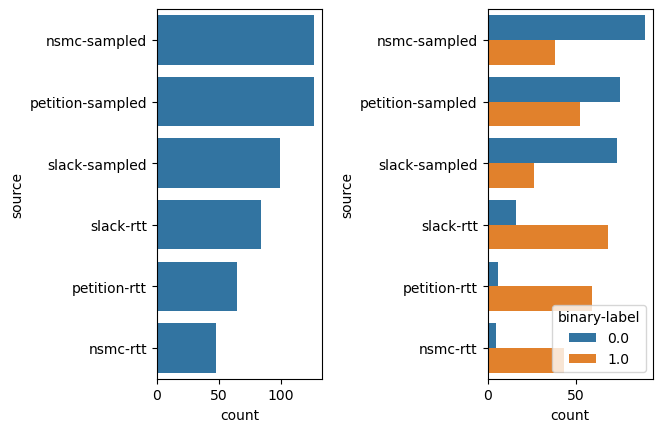

In [13]:
fig, axes = plt.subplots(1, 2)

sns.countplot(y="source", data=EDA_d, order=EDA_d['source'].value_counts().index,
              ax=axes[0])

sns.countplot(y='source', data=EDA_d,
              hue='binary-label',
              order=EDA_d['source'].value_counts().index,
              ax=axes[1]
             )

plt.subplots_adjust(wspace=1)  # 가로 간격을 넓힘

plt.show()

# 분석 결과
### 0이 많은 source는 **-sampled 이고
### 1이 많은 source는 **-rrt 이다

<Axes: xlabel='count', ylabel='source'>

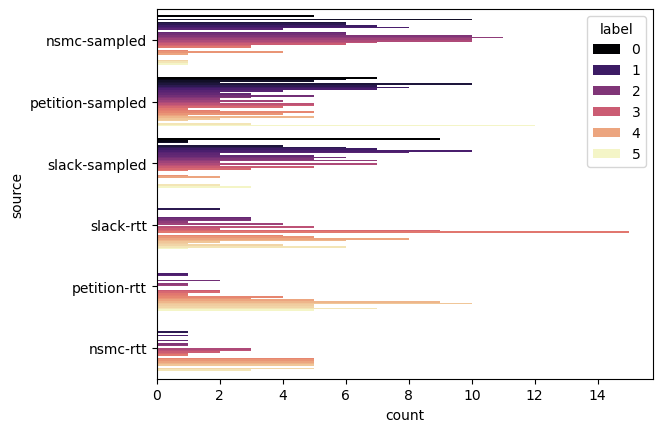

In [14]:
sns.countplot(y='source', data=EDA_d,
              hue='label',
              order=EDA_d['source'].value_counts().index,
              palette='magma'
             )

# 결론
### 0이 많이 분포하는 source는 **-sampled 을 빼버리게 되면 